In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


from statsmodels.tsa.seasonal import seasonal_decompose

from neuralprophet import NeuralProphet

#To mute Warnings
import warnings
warnings.filterwarnings("ignore")

c:\Miniconda3\envs\intern\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
# Weekly
df_w_2020_23 = pd.read_csv('./data/VolumeDataset_2020_to_2023.csv')
#  Made Date index column 
dates = df_w_2020_23.Year*100+df_w_2020_23.Week
df_w_2020_23['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df_w_2020_23 = df_w_2020_23.set_index('Date')

Mean (Low to High) : ['W3' 'E1' 'N2' 'W1' 'S1' 'N1' 'E2' 'W2' 'A2' 'S2' 'S3' 'A1' 'N3']

SD (Low to High) : ['N1' 'E1' 'S3' 'N2' 'W2' 'A2' 'S2' 'A1' 'W3' 'E2' 'W1' 'S1' 'N3']
HM/HV - N2, HM/LV - W3, LM/HV - S2


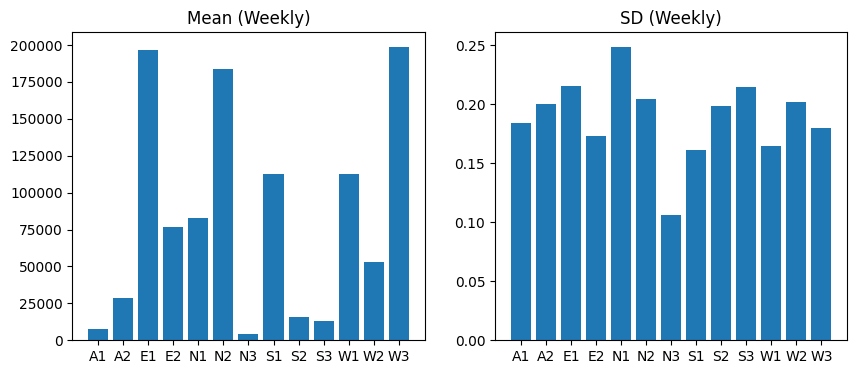

In [3]:
# Normalised Data
w_normalised = df_w_2020_23[['Year', 'Week']]
for region in df_w_2020_23.columns[2:-2]:
    mini = df_w_2020_23[region].min()
    maxi = df_w_2020_23[region].max()
    w_normalised[region] = (df_w_2020_23[region]-mini)/(maxi-mini)


# Plot Graph For Mean and SD
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].bar(df_w_2020_23.columns[2:-2],df_w_2020_23.iloc[:, 2:-2].mean())
axes[0].set_title('Mean (Weekly)')
axes[1].set_title('SD (Weekly)')
axes[1].bar(df_w_2020_23.columns[2:-2],w_normalised.iloc[:, 2:].std().rename("SD"))

print(f'Mean (Low to High) : {df_w_2020_23.iloc[:, 2:-2].mean().sort_values(ascending=False)[:].index.values}\n')
print(f'SD (Low to High) : {w_normalised.iloc[:, 2:].std().sort_values(ascending=False)[:].index.values}')

print("HM/HV - N2, HM/LV - W3, LM/HV - S2")

# Neural Prpphet Prediction (Weekly)
    - N2 (High Varience/ High Mean)

In [4]:
from datetime import datetime
temp_n2 = pd.read_excel('./data/temperature/temp_n2_w3_s2/N2_temp_2020_23.xlsx')
temp_n2['Date'] = pd.to_datetime(temp_n2[['Year', 'Month', 'Day']])
temp_n2

,Day,Year,Month,Date,delhi_avg,laknow_avg,rajasthan_avg
0,1,2019,1,2019-01-01,12.8,13.7,20.3
1,2,2019,1,2019-01-02,13.8,14.7,19.9
2,3,2019,1,2019-01-03,13.5,14.9,20.2
3,4,2019,1,2019-01-04,12.2,14.8,20.8
4,5,2019,1,2019-01-05,13.2,15.5,20.4
...,...,...,...,...,...,...,...
1819,27,2023,12,2023-12-27,49.5,NaN,NaN
1820,28,2023,12,2023-12-28,47.9,NaN,NaN
1821,29,2023,12,2023-12-29,50.6,NaN,NaN
1822,30,2023,12,2023-12-30,56.5,NaN,NaN


In [5]:
temp_n2[364:1302]

,Day,Year,Month,Date,delhi_avg,laknow_avg,rajasthan_avg
364,1,2020,1,2020-01-01,10.8,13.1,22.0
365,2,2020,1,2020-01-02,13.7,16.7,22.2
366,3,2020,1,2020-01-03,14.4,14.4,23.4
367,4,2020,1,2020-01-04,13.6,14.5,23.6
368,5,2020,1,2020-01-05,14.2,14.5,24.2
...,...,...,...,...,...,...,...
1297,23,2022,7,2022-07-23,28.6,27.4,23.7
1298,24,2022,7,2022-07-24,29.3,28.1,23.2
1299,25,2022,7,2022-07-25,30.1,30.3,23.1
1300,26,2022,7,2022-07-26,30.6,30.0,22.8


In [9]:
# Data
q1_n2_data = df_w_2020_23.loc[:,['N2']].reset_index(drop=True)
q1_n2_data['Date'] = df_w_2020_23.index
q1_n2_data.columns = ['y','ds']
q1_n2_data = q1_n2_data[['ds', 'y']]
# n2_data.fillna(0.00,inplace=True)

q1_n2_data = q1_n2_data.drop(q1_n2_data[q1_n2_data.ds.duplicated(keep='first')].index, axis=0)
def fun_delhi(date):
    d = temp_n2[temp_n2.Date == date].delhi_avg.values
    return d[0] if d else 0
# q1_n2_data['temp_delhi'] = q1_n2_data.ds.apply(fun_delhi)

def fun_luknow(date):
    d = temp_n2[temp_n2.Date == date].laknow_avg.values
    return d[0] if d else 0

def fun_rajasthan(date):
    d = temp_n2[temp_n2.Date == date].rajasthan_avg.values
    return d[0] if d else 0
q1_n2_data['temp_rajasthan'] = q1_n2_data.ds.apply(fun_rajasthan)


In [7]:
confidence_level = 0.9

boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

In [11]:
q1_n2_data

,ds,y,temp_delhi
0,2020-01-12,48682.29,13.6
1,2020-01-19,75084.86,11.0
2,2020-01-26,90128.99,14.7
3,2020-02-02,156190.36,12.1
4,2020-02-09,154508.37,13.9
...,...,...,...
205,2023-12-03,159852.63,63.9
206,2023-12-10,119345.26,62.8
207,2023-12-17,223724.46,60.5
208,2023-12-24,160806.39,53.4


In [10]:
b = q1_n2_data[:115] #
b_n2_ja = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=4,
    n_forecasts = 12,
    learning_rate=0.01, quantiles=quantiles)
# b_n2_ja.add_future_regressor("temp_delhi")
# b_n2_ja.add_future_regressor("temp_laknow")
b_n2_ja.add_future_regressor("temp_rajasthan")
b_n2_ja.add_country_holidays(country_name="IN")
b_q1_metrics =  b_n2_ja.fit(b[:101],freq='W', epochs=850)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.01% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Epoch 850: 100%|██████████| 850/850 [00:00<00:00, 10228.89it/s, loss=0.0224, v_num=188, MAE=3.74e+4, RMSE=4.95e+4, Loss=0.0226, RegLoss=0.000]  


In [11]:
b_future = b_n2_ja.make_future_dataframe(b[:101], periods=10, n_historic_predictions=True, regressors_df=b.drop('y', axis=1)[101:113])
b_forecast = b_n2_ja.predict(b_future)
b_forecast['y']=pd.concat([b['y']], axis=0, ignore_index=True)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.01% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 12.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.115% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.115% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.data.processing._handle_missing_data) - Dropped 12 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 52.60it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [13]:
b_forecast.iloc[100:, [0,1,10,11,12,13]]

,ds,y,yhat9,yhat10,yhat11,yhat12
100,2021-12-12,145646.87,113122.507812,109987.460938,105679.12500,159725.25000
101,2021-12-19,144741.66,152459.875000,154809.062500,155722.68750,154291.65625
102,2021-12-26,187316.23,181872.718750,157134.343750,157451.78125,151934.71875
103,2022-01-02,150460.35,206892.031250,182291.562500,155508.59375,153444.09375
104,2022-01-09,100759.70,212748.562500,209849.375000,190896.96875,174094.31250
105,2022-01-16,213987.46,235179.593750,231760.500000,231288.84375,214745.40625
106,2022-01-23,236690.90,264303.187500,249255.531250,248390.40625,245602.93750
107,2022-01-30,244258.45,285422.437500,273934.343750,264629.65625,262101.25000
108,2022-02-06,330786.82,317285.625000,307425.062500,302049.87500,291715.71875
109,2022-02-13,255086.80,316219.062500,315105.156250,310444.09375,301822.43750


In [38]:
# Data
q1_n2_data = df_w_2020_23.loc[:,['N2']].reset_index(drop=True)
q1_n2_data['Date'] = df_w_2020_23.index
q1_n2_data.columns = ['y','ds']
q1_n2_data = q1_n2_data[['ds', 'y']]
q1_n2_data = q1_n2_data.drop(q1_n2_data[q1_n2_data.ds.duplicated(keep='first')].index, axis=0)

q1_n2_data['temp_laknow'] = q1_n2_data.ds.apply(fun_luknow)
# n2_data.fillna(0.00,inplace=True)

In [39]:
c = q1_n2_data[:113] #
c_n2_ja = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=4,
    n_forecasts = 12,
    learning_rate=0.01, quantiles=quantiles)
# c_n2_ja.add_future_regressor("temp_delhi")
c_n2_ja.add_future_regressor("temp_laknow")
# b_n2_ja.add_future_regressor("temp_rajasthan")
c_n2_ja.add_country_holidays(country_name="IN")
c_q1_metrics =  c_n2_ja.fit(c[:101],freq='W', epochs=850)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.01% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Epoch 850: 100%|██████████| 850/850 [00:00<00:00, 9858.12it/s, loss=0.0222, v_num=164, MAE=3.77e+4, RMSE=4.97e+4, Loss=0.0224, RegLoss=0.000]   


In [41]:
c_future = c_n2_ja.make_future_dataframe(c[:101], periods=10, n_historic_predictions=True, regressors_df=c.drop('y', axis=1)[101:113])
c_forecast = c_n2_ja.predict(c_future)
c_forecast['y']=pd.concat([c['y']], axis=0, ignore_index=True)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.01% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 12.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.115% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.115% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.data.processing._handle_missing_data) - Dropped 12 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 132.76it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [42]:
c_forecast.iloc[100:, [1,10,11,12,13]]

,y,yhat9,yhat10,yhat11,yhat12
100,145646.87,101812.226562,104669.789062,101862.031250,145213.718750
101,144741.66,135210.000000,143809.093750,146814.687500,144257.187500
102,187316.23,152799.250000,116048.210938,120251.132812,115287.890625
103,150460.35,180000.250000,147381.703125,111770.132812,114016.132812
104,100759.70,176881.281250,177263.343750,151231.218750,138675.281250
105,213987.46,205598.156250,202204.843750,203359.656250,188417.781250
106,236690.90,226970.406250,210257.562500,208839.125000,207590.781250
107,244258.45,248590.593750,240424.687500,228343.218750,226436.156250
108,330786.82,260272.593750,264308.093750,260192.875000,252002.968750
109,255086.80,258549.250000,260333.500000,264236.406250,258688.906250


In [43]:
# Data
q1_n2_data = df_w_2020_23.loc[:,['N2']].reset_index(drop=True)
q1_n2_data['Date'] = df_w_2020_23.index
q1_n2_data.columns = ['y','ds']
q1_n2_data = q1_n2_data[['ds', 'y']]
q1_n2_data = q1_n2_data.drop(q1_n2_data[q1_n2_data.ds.duplicated(keep='first')].index, axis=0)

q1_n2_data['temp_rajasthan'] = q1_n2_data.ds.apply(fun_rajasthan)
# n2_data.fillna(0.00,inplace=True)

In [46]:
d = q1_n2_data[:113] #
d_n2_ja = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=4,
    n_forecasts = 12,
    learning_rate=0.01, quantiles=quantiles)
# c_n2_ja.add_future_regressor("temp_delhi")
# d_n2_ja.add_future_regressor("temp_laknow")
d_n2_ja.add_future_regressor("temp_rajasthan")
d_n2_ja.add_country_holidays(country_name="IN")
d_q1_metrics =  d_n2_ja.fit(d[:101],freq='W', epochs=850)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.01% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Epoch 850: 100%|██████████| 850/850 [00:00<00:00, 10231.57it/s, loss=0.0225, v_num=165, MAE=3.78e+4, RMSE=5.02e+4, Loss=0.0228, RegLoss=0.000]  


In [47]:
d_future = d_n2_ja.make_future_dataframe(d[:101], periods=10, n_historic_predictions=True, regressors_df=d.drop('y', axis=1)[101:113])
d_forecast = d_n2_ja.predict(d_future)
d_forecast['y']=pd.concat([d['y']], axis=0, ignore_index=True)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.01% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 12.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.115% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.115% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.data.processing._handle_missing_data) - Dropped 12 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 99.79it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [1]:
d_forecast.iloc[100:, [0,1,10,11,12,13]]

NameError: name 'd_forecast' is not defined

In [97]:
# Data
q1_n2_data = df_w_2020_23.loc[:,['N2']].reset_index(drop=True)
q1_n2_data['Date'] = df_w_2020_23.index
q1_n2_data.columns = ['y','ds']
q1_n2_data = q1_n2_data[['ds', 'y']]
q1_n2_data = q1_n2_data.drop(q1_n2_data[q1_n2_data.ds.duplicated(keep='first')].index, axis=0)

q1_n2_data['temp_delhi'] = q1_n2_data.ds.apply(fun_delhi)
q1_n2_data['temp_laknow'] = q1_n2_data.ds.apply(fun_luknow)
# q1_n2_data['temp_rajasthan'] = q1_n2_data.ds.apply(fun_rajasthan)
# n2_data.fillna(0.00,inplace=True)

In [98]:
e = q1_n2_data[:113] #
e_n2_ja = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=4,
    n_forecasts = 12,
    learning_rate=0.01, quantiles=quantiles)
e_n2_ja.add_future_regressor("temp_delhi")
e_n2_ja.add_future_regressor("temp_laknow")
# e_n2_ja.add_future_regressor("temp_rajasthan")
# e_n2_ja.add_country_holidays(country_name="IN")
e_q1_metrics =  e_n2_ja.fit(e[:101],freq='W', epochs=850)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.01% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Epoch 850: 100%|██████████| 850/850 [00:00<00:00, 13234.73it/s, loss=0.0225, v_num=170, MAE=3.78e+4, RMSE=5e+4, Loss=0.0228, RegLoss=0.000]     


In [99]:
e_future = e_n2_ja.make_future_dataframe(e[:101], periods=12, n_historic_predictions=True, regressors_df=e.drop('y', axis=1)[101:113])
e_forecast = e_n2_ja.predict(e_future)
e_forecast['y']=pd.concat([e['y']], axis=0, ignore_index=True)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.01% of the data.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.115% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.115% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.data.processing._handle_missing_data) - Dropped 12 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 100.75it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [100]:
e_forecast.iloc[100:, [1,10,11,12,13]]

,y,yhat9,yhat10,yhat11,yhat12
100,145646.87,105853.359375,110027.796875,107836.031250,147486.375000
101,144741.66,143777.265625,151877.656250,156069.000000,154365.031250
102,187316.23,159010.437500,121580.281250,125616.218750,124785.554688
103,150460.35,190931.187500,156631.656250,120139.132812,122650.921875
104,100759.70,184019.625000,184134.375000,156759.187500,140366.781250
105,213987.46,218492.468750,214491.062500,215458.093750,199087.687500
106,236690.90,239473.625000,222347.437500,220712.843750,220079.250000
107,244258.45,265233.875000,256717.187500,244404.406250,242313.656250
108,330786.82,278873.031250,282859.343750,278771.562500,270409.906250
109,255086.80,281176.531250,281642.531250,285578.500000,280737.875000


In [104]:
# Data
q1_n2_data = df_w_2020_23.loc[:,['N2']].reset_index(drop=True)
q1_n2_data['Date'] = df_w_2020_23.index
q1_n2_data.columns = ['y','ds']
q1_n2_data = q1_n2_data[['ds', 'y']]
q1_n2_data = q1_n2_data.drop(q1_n2_data[q1_n2_data.ds.duplicated(keep='first')].index, axis=0)

# q1_n2_data['temp_delhi'] = q1_n2_data.ds.apply(fun_delhi)
# q1_n2_data['temp_laknow'] = q1_n2_data.ds.apply(fun_luknow)
q1_n2_data['temp_rajasthan'] = q1_n2_data.ds.apply(fun_rajasthan)
# n2_data.fillna(0.00,inplace=True)

In [134]:
q1_n2_data[:113]

,ds,y,temp_rajasthan
0,2020-01-12,48682.29,21.1
1,2020-01-19,75084.86,23.3
2,2020-01-26,90128.99,23.4
3,2020-02-02,156190.36,22.9
4,2020-02-09,154508.37,23.8
...,...,...,...
110,2022-02-06,330786.82,22.8
111,2022-02-13,255086.80,22.3
112,2022-02-20,266461.52,22.7
113,2022-02-27,361735.72,22.5


In [130]:
diwali_events = pd.DataFrame(
    {
        "event": "diwali",
        "ds": pd.to_datetime(
            [
                "2020-10-25",
                "2021-10-31",
                "2022-10-23",

            ]
        ),
    }
)
holi_events = pd.DataFrame(
    {
        "event": "holi",
        "ds": pd.to_datetime(
            [
                
                "2022-03-20",
                "2021-03-28",
                "2020-03-08",


            ]
        ),
    }
)
navratri_events = pd.DataFrame(
    {
        "event": "navratri",
        "ds": pd.to_datetime(
            [
                "2022-10-02",
                "2021-10-10",
                "2020-10-25",

            ]
        ),
    }
)

In [131]:
f = q1_n2_data[:113]
f_n2_ja = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=4,
    n_forecasts = 12,
    learning_rate=0.01, quantiles=quantiles)
# f_n2_ja.add_future_regressor("temp_delhi")
# f_n2_ja.add_future_regressor("temp_laknow")
f_n2_ja.add_future_regressor("temp_rajasthan")
f_n2_ja.add_events("_holidays")
f = f_n2_ja.create_df_with_events(f, holidays_events)
f_q1_metrics =  f_n2_ja.fit(f[:101],freq='W', epochs=850)

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.01% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8


Epoch 850: 100%|██████████| 850/850 [00:00<00:00, 8445.10it/s, loss=0.024, v_num=173, MAE=3.96e+4, RMSE=5.12e+4, Loss=0.0248, RegLoss=0.000]    


In [132]:
f_future = f_n2_ja.make_future_dataframe(f[:101], periods=12, n_historic_predictions=True, regressors_df=f.drop('y', axis=1)[101:113])
f_forecast = f_n2_ja.predict(f_future)
f_forecast['y']=pd.concat([f['y']], axis=0, ignore_index=True)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.01% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
WARNING - (NP.data.splitting._make_future_dataframe) - Future values not supplied for user specified events. All events being treated as not occurring in future
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.115% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.115% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.data.processing._handle_missing_data) - Dropped 12 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 55.19it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [135]:
f_forecast.iloc[100:, [0,1,10,11,12,13]]

,ds,y,yhat9,yhat10,yhat11,yhat12
100,2021-12-12,145646.87,100735.054688,101722.828125,95613.414062,145223.859375
101,2021-12-19,144741.66,134766.718750,145084.718750,163872.375000,155551.750000
102,2021-12-26,187316.23,165354.031250,132294.750000,138788.593750,146606.093750
103,2022-01-02,150460.35,188644.937500,159459.437500,104541.914062,111872.992188
104,2022-01-09,100759.70,189099.093750,185361.437500,157865.843750,110371.515625
105,2022-01-16,213987.46,208389.125000,206528.687500,209134.343750,179490.875000
106,2022-01-23,236690.90,236741.968750,219993.750000,222612.500000,222052.406250
107,2022-01-30,244258.45,253560.531250,241679.843750,233060.906250,234033.718750
108,2022-02-06,330786.82,281911.250000,272881.531250,272287.000000,259561.812500
109,2022-02-13,255086.80,275215.437500,275792.937500,275669.656250,269582.562500
